In [1]:
import torch
import torch.optim as optim
import torch.nn as nn
from torchvision.utils import save_image
from tqdm import tqdm
from datasets.mvtec import MVTecDataset
import torchvision.transforms as T
# from datasets.preprocessing import generate_image_list, augment_images



use_cuda = torch.cuda.is_available()
device = torch.device('cuda' if use_cuda else 'cpu')




if use_cuda:
    torch.cuda.manual_seed_all(42)

kwargs = {'num_workers': 4, 'pin_memory': True} if use_cuda else {}

data_path = 'C:\Jupyter Workspace\Autoencoders\RIAD - Reconstruction by Inpainting for visual Anomaly Detection\datasets\mvtec_anomaly_detection'
obj = 'eur50_front'
img_size = 256
validation_ratio=0.2
batch_size = 4

train_dataset : MVTecDataset = MVTecDataset(data_path, class_name=obj, is_train=True, resize=img_size)
img_nums = len(train_dataset)
valid_num = int(img_nums * validation_ratio)
train_num = img_nums - valid_num
train_data, val_data = torch.utils.data.random_split(train_dataset, [train_num, valid_num])
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True, **kwargs)
val_loader = torch.utils.data.DataLoader(val_data, batch_size=32, shuffle=False, **kwargs)
test_dataset = MVTecDataset(data_path, class_name=obj, is_train=False, resize=img_size)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=True, **kwargs)

In [8]:
for epoch in range(2):
    for i, data in enumerate(test_loader):
        # get the inputs
        inputs, labels = data
        inputs = np.array(inputs)
        print(inputs.shape)
        # Run your training process
        print(f'Epoch: {i} | Inputs {inputs} | Labels {labels}')

RuntimeError: Caught RuntimeError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "c:\Users\Kornelije\miniconda3\Lib\site-packages\torch\utils\data\_utils\worker.py", line 308, in _worker_loop
    data = fetcher.fetch(index)
           ^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Kornelije\miniconda3\Lib\site-packages\torch\utils\data\_utils\fetch.py", line 54, in fetch
    return self.collate_fn(data)
           ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Kornelije\miniconda3\Lib\site-packages\torch\utils\data\_utils\collate.py", line 265, in default_collate
    return collate(batch, collate_fn_map=default_collate_fn_map)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Kornelije\miniconda3\Lib\site-packages\torch\utils\data\_utils\collate.py", line 142, in collate
    return [collate(samples, collate_fn_map=collate_fn_map) for samples in transposed]  # Backwards compatibility.
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Kornelije\miniconda3\Lib\site-packages\torch\utils\data\_utils\collate.py", line 142, in <listcomp>
    return [collate(samples, collate_fn_map=collate_fn_map) for samples in transposed]  # Backwards compatibility.
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Kornelije\miniconda3\Lib\site-packages\torch\utils\data\_utils\collate.py", line 119, in collate
    return collate_fn_map[elem_type](batch, collate_fn_map=collate_fn_map)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Kornelije\miniconda3\Lib\site-packages\torch\utils\data\_utils\collate.py", line 162, in collate_tensor_fn
    return torch.stack(batch, 0, out=out)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: stack expects each tensor to be equal size, but got [1, 256, 256] at entry 0 and [3, 256, 256] at entry 1


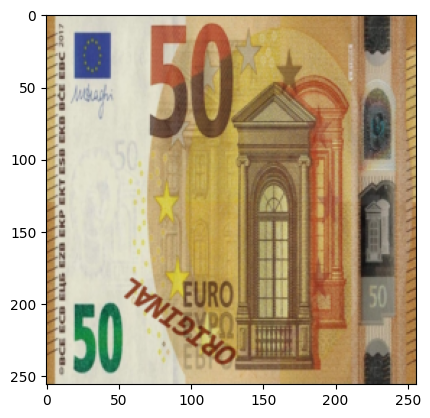

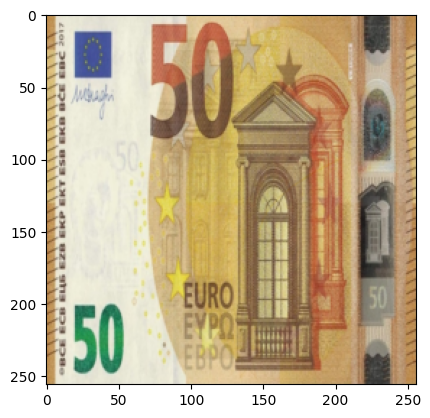

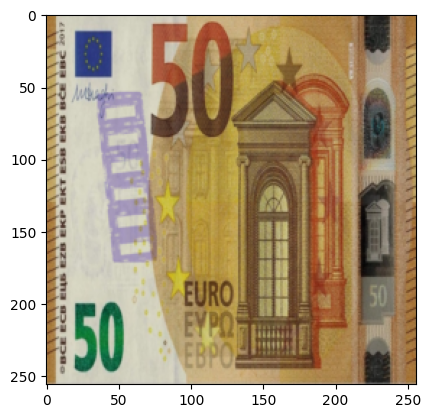

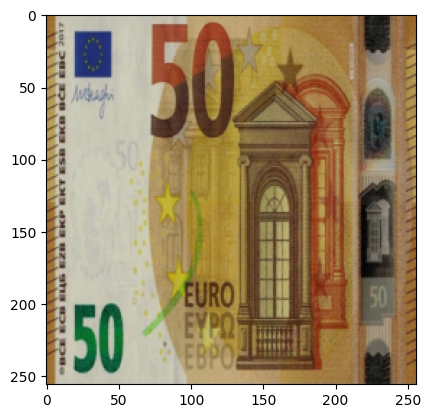

In [2]:
import matplotlib.pyplot as plt
transform = T.ToPILImage()
i = -1
for data in test_dataset:
    i += 1 
    if i > 3:
        break
    img = transform(data[0])
    plt.imshow(img)
    plt.show()